# 0. Install Dependencies and Bring in Data

In [4]:
%pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/opt/homebrew/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/homebrew/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/homebrew/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)

In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [30]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [31]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# 1. Preprocess

In [32]:
print(df.shape)

(159571, 8)


In [33]:
new_df=df.iloc[:20000,:]
new_df.shape

(20000, 8)

In [38]:
new_df['comment_text'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [39]:
%pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 11.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download the stopwords from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# A function to preprocess the text


# Example usage


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pragyanborah/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pragyanborah/nltk_data...


Filtered Words: ['example', 'sentence', 'demonstrate', 'text', 'preprocessing', ',', 'including', 'stopwords', 'removal', '.']
Word Counts: Counter({'example': 1, 'sentence': 1, 'demonstrate': 1, 'text': 1, 'preprocessing': 1, ',': 1, 'including': 1, 'stopwords': 1, 'removal': 1, '.': 1})


[nltk_data]   Unzipping tokenizers/punkt.zip.


In [42]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

In [44]:
text = "This is an example sentence to demonstrate text preprocessing, including stopwords removal."
filtered_words = preprocess_text(text)
word_counts = Counter(filtered_words)

print("Filtered Sentence:", filtered_words)
print("Word Counts:", word_counts)


Filtered Sentence: example sentence demonstrate text preprocessing , including stopwords removal .
Word Counts: Counter({'e': 11, ' ': 9, 's': 6, 'n': 6, 't': 6, 'o': 5, 'r': 5, 'p': 4, 'a': 3, 'm': 3, 'l': 3, 'c': 3, 'd': 3, 'i': 3, 'x': 2, 'g': 2, ',': 1, 'u': 1, 'w': 1, 'v': 1, '.': 1})


In [46]:
new_df['comment_text']=new_df['comment_text'].apply(preprocess_text)

/var/folders/b3/zb_w1fc157xbfgjywb_kvyb40000gn/T/ipykernel_20561/2318222154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['comment_text']=new_df['comment_text'].apply(preprocess_text)


In [48]:
new_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww ! matches background colour 'm seemingly...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man , 'm really trying edit war . 's guy c...",0,0,0,0,0,0
3,0001b41b1c6bb37e,`` ca n't make real suggestions improvement - ...,0,0,0,0,0,0
4,0001d958c54c6e35,", sir , hero . chance remember page 's ?",0,0,0,0,0,0


In [53]:
len(new_df['comment_text'].max())

3269

In [47]:
all_words = [word for comment in new_df['comment_text'] for word in comment]
len(set(all_words))

1092

In [8]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      2.1.0
aiofiles                     23.2.1
altair                       5.3.0
annotated-types              0.6.0
anyio                        4.3.0
appnope                      0.1.3
asttokens                    2.4.0
astunparse                   1.6.3
attrs                        23.2.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bs4                          0.0.1
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.16.0
charset-normalizer           3.2.0
click                        8.1.7
comm                         0.1.4
contourpy                    1.2.0
cycler                       0.12.1
dateutils                    0.6.12
debugpy                      1.8.0
decorator                    5.1.1
docutils                     0.20.1
executing                    1.2.0
fastapi                    

In [9]:
from tensorflow.keras.layers import TextVectorization

In [49]:
X = new_df['comment_text']
y = new_df[new_df.columns[2:]].values

In [50]:
MAX_FEATURES = 2000 # number of words in the vocab

In [51]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [54]:
vectorizer.adapt(X.values)

In [55]:
vectorized_text = vectorizer(X.values)

In [56]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [57]:
train = dataset.take(int(len(dataset)*.8))
val = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.1))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 2. Create Sequential Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [58]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [59]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          64032     
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [61]:
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
1000/1000 [==============================] - 430s 428ms/step - loss: 0.1021 - val_loss: 0.0687
Epoch 2/20
1000/1000 [==============================] - 418s 418ms/step - loss: 0.0680 - val_loss: 0.0577
Epoch 3/20
1000/1000 [==============================] - 419s 419ms/step - loss: 0.0626 - val_loss: 0.0541
Epoch 4/20
1000/1000 [==============================] - 420s 420ms/step - loss: 0.0619 - val_loss: 0.0576
Epoch 5/20
1000/1000 [==============================] - 419s 419ms/step - loss: 0.0562 - val_loss: 0.0523
Epoch 6/20
1000/1000 [==============================] - 417s 417ms/step - loss: 0.0531 - val_loss: 0.0520
Epoch 7/20
1000/1000 [==============================] - 417s 417ms/step - loss: 0.0491 - val_loss: 0.0535
Epoch 8/20
1000/1000 [==============================] - 424s 424ms/step - loss: 0.0494 - val_loss: 0.0502
Epoch 9/20
1000/1000 [==============================] - 414s 414ms/step - loss: 0.0463 - val_loss: 0.0428
Epoch 10/20
1000/1000 [=======================

In [62]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

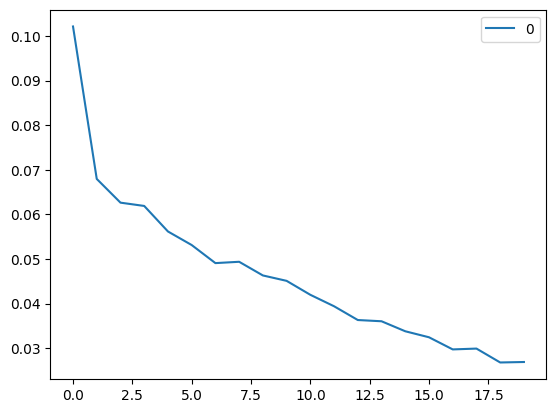

In [63]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history['loss']).plot()
plt.show()

# 3. Make Predictions

In [64]:
input_text = "You freaking suck! I am going to hit you."

# Vectorize the input text
vectorized_input = vectorizer([input_text])  # Vectorize text

# Reshape the vectorized input correctly
# It should be (1, sequence_length), without extra dimensions
vectorized_input = vectorized_input.numpy()  # Convert to NumPy array if not already
if vectorized_input.ndim == 2:
    vectorized_input = np.expand_dims(vectorized_input, axis=0)
elif vectorized_input.ndim == 3:
    vectorized_input = np.squeeze(vectorized_input, axis=1)  # Remove the unnecessary middle dimension

# Predict using the model with the correctly shaped input
res = model.predict(vectorized_input)

# Convert probabilities to binary outputs
predicted_classes = (res > 0.5).astype(int)

# Print the results
print(predicted_classes)


ValueError: in user code:

    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "bidirectional_1" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 1, 1800, 32)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1, 1800), dtype=int64)
      • training=False
      • mask=None


In [34]:
(res > 0.5).astype(int)

NameError: name 'res' is not defined

In [35]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

# 4. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

# 5. Test and Gradio

In [36]:
!pip install gradio jinja2

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 5.2 MB/s eta 0:00:00
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 9.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 9.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.6/250.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.9/407.9 kB 8.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 M

In [37]:
import tensorflow as tf
import gradio as gr

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
model.save('boss.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model = tf.keras.models.load_model('boss.h5')

In [40]:
input_str = vectorizer('hey i freaken hate you!')

In [41]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 544ms/step


In [42]:
res

array([[0.75754285, 0.03581593, 0.45208785, 0.02825002, 0.37372157,
        0.06418984]], dtype=float32)

In [45]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [46]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

AttributeError: module 'gradio' has no attribute 'inputs'

In [47]:
interface.launch(share=True)

NameError: name 'interface' is not defined